## Modelización del entrelazamiento de dos qubits

In [ ]:
# QuantumCircuit es una clase que permite crear circuitos cuánticos.
# Aer es un simulador de Qiskit que permite ejecutar circuitos cuánticos en un entorno simulado.
# Transpile es una función que optimiza y transforma circuitos cuánticos para que sean ejecutables en diferentes backends.
# matplotlib.pyplot es una biblioteca de Python para crear gráficos y visualizaciones.
# plot_histogram es una función de Qiskit que permite visualizar los resultados de la ejecución de circuitos cuánticos en forma de histograma.
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
import matplotlib.pyplot as plt 
from qiskit.visualization import plot_histogram 

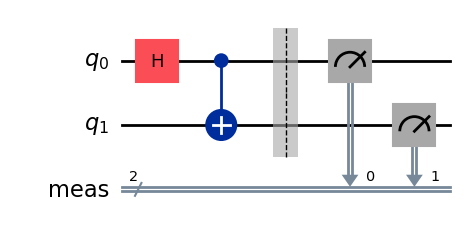

In [7]:
qc = QuantumCircuit(2) # Definimos un circuito de 2 qubits no definimos bits clásicos ahora
qc.h(0) # Añadimos una puerta Hadamard al primer qubit
qc.cx(0, 1) # Añadimos una puerta CNOT entre el primer y el segundo qubit.  
# El qubit0 es de control y qubit1 es de objetivo
qc.measure_all() # measure_all() mide todos los qubits y bits clásicos del circuito.add()
qc.draw('mpl') # Dibuja el circuito usando matplotlib

In [5]:
# Inicializar el simulador cuántico
# Es una clase que proporciona una interfaz para ejecutar circuitos cuánticos
# en un entorno simulado, lo que permite probar y depurar circuitos cuánticos sin necesidad de un hardware cuántico real.
simulator = AerSimulator()

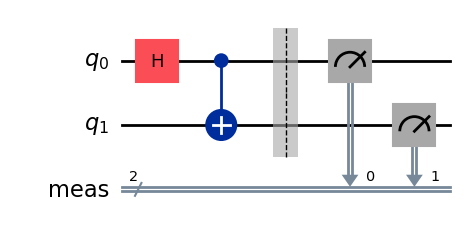

In [6]:
# Transpilar el circuito
# El transpile paso es necesario para optimizar el circuito para el backend específico
transpiled_qc = transpile(qc, simulator)
transpiled_qc.draw('mpl') # Dibuja el circuito transpileado usando matplotlib

## NOTA:
En este caso el transpiler no ha realizado ninguna optimización, ya que el circuito es muy simple, aunque 
en circuitos más complejos, el transpiler puede realizar optimizaciones significativas para mejorar la eficiencia y el rendimiento del 
circuito en el backend específico.

De haberse realizado cambios, debo ejecutar el resultado del transpiler y no del circuito original. 


In [9]:
# Ejecutar el circuito en el simulador 1024 veces
# Al ejecutarlo varias veces, obtenemos una distribución de resultados que nos permite analizar el comportamiento del circuito.
result = simulator.run(transpiled_qc, shots=1024).result()

In [10]:
# Obtener los resultados de las mediciones
counts = result.get_counts()
print("Resultados de la medición:", counts)

Resultados de la medición: {'11': 506, '00': 518}


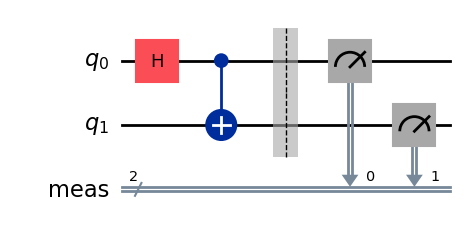

In [11]:
# Dibujar el circuito
transpiled_qc.draw(output='mpl')

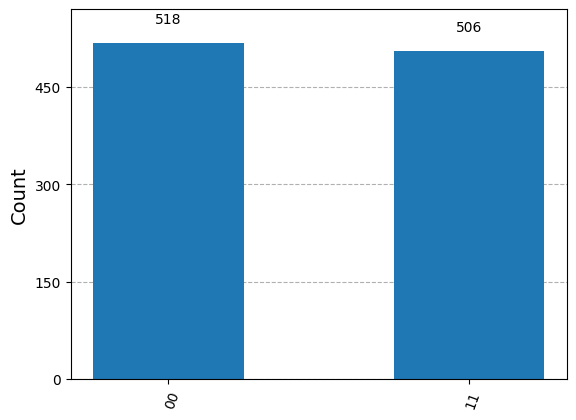

In [13]:
plot_histogram(counts) 

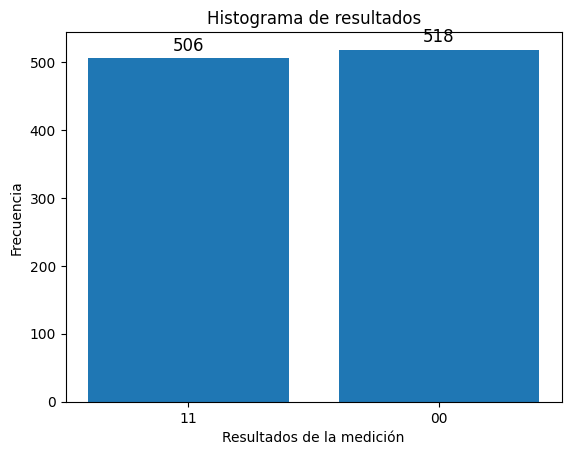

In [14]:
# Mostrar la gráfica de los resultados de la medición
# Vuelvo a crear el histograma pero con más datos.
plt.bar(counts.keys(), counts.values())
valores = list(counts.values())
for i, valor in enumerate(valores):
    plt.text(i, valor + max(valores)*0.01, str(valor), ha='center', va='bottom', fontsize=12)
plt.xlabel('Resultados de la medición')
plt.ylabel('Frecuencia')
plt.title('Histograma de resultados')
plt.show()